<a href="https://colab.research.google.com/github/zxcej/COMP691_LABS/blob/main/Johnson's_2023_Lab1_Ex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 1 Exercises for COMP 691 (Deep Learning)

In this lab we are going to review some of Python's scientific toolkits. The goal is to familarize you with Google Colab so you can start to get comfortable with it. Colab offers free GPUs, which will be very helpful for this course.

Start by making a **copy** of this notebook in your Google Colab
.

# New Section

## Exercise 1: Hello there!

For starters, run the line below!

In [1]:
print('hello Colab')

hello Colab


---

## Exercise 2: Plotting

Consider the function 
$f(x)$ = $\exp(-(x-2)^2)+\exp(-\frac{(x-6)^2}{10})+\frac{1}{x^2+1}$

*   **Import** *pyplot* module from [matplotlib ](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html) as plt

*  **Use** [np.linspace](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html) to sample the points in the interval [-10,10]

*  **Plot** the function $f(x)$ in the range $[-10,10]$ using matplotlib

*  **Use** plt.xlabel, plt.ylabel, and plt.title appropriately. 

*   Try and get comfortable with creating functions wherever you think is necessary.

Your plot should look something like this.

<img src='https://drive.google.com/uc?id=1fviWqemVN7qz06cBx4leI0XJ9o_fOZS2' width="350" height="200" class="center">


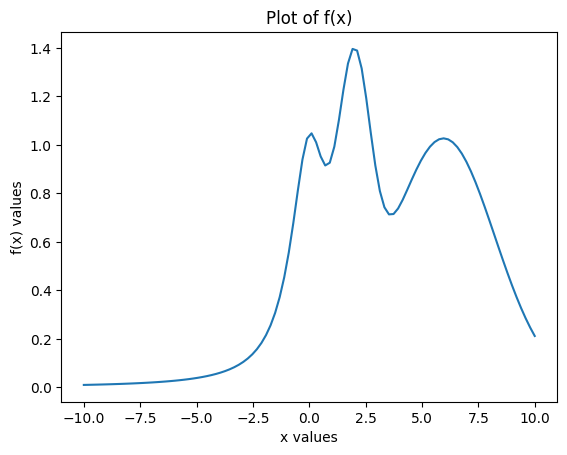

In [2]:
#Your answer here
import numpy as np
import matplotlib.pyplot as plt

#Plot with matplotlib
#sample the points in the interval [-10,10]
x = np.linspace(-10,10,100)
#plot the function \exp(-(x-2)^2)+\exp(-\frac{(x-6)^2}{10})+\frac{1}{x^2+1} in the range of -10 to 10
y = np.exp(-(x-2)**2)+np.exp(-(x-6)**2/10)+1/(x**2+1)
plt.plot(x,y)
#label x axis and y axis
plt.xlabel('x values')
plt.ylabel('f(x) values')
#label the title
plt.title('Plot of f(x)')
plt.show()




---

## Exercise 3: Data Visualization and Multi-Class Classification


In this exercise, we will work with a dataset called [wine](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html) which has 3 categories and 178 samples. For each sample there are 13 features. 

Start by running the cell below.

In [3]:
#Load sklearn data
from sklearn.datasets import load_wine
data = load_wine()
#targets for each sample 
print(data.target.shape)
print(data.data.shape)

(178,)
(178, 13)


### Exercise 3.1:

 Now let's use [T-SNE](http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) to visualize the data in 2-D (number of components= 2). This means that T-SNE will project down the data from having 13 dimensions/features to having 2 dimensions.

 *  Use learning_rate='auto' and init='random' as hyperparameters for your T-SNE object.
 *  Use [plt.scatter](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) to create a scatter plot of your embedded data to visualize the embedding space.
 *  Make sure your scatter plot has x and y labels as well as a title and a legend.

 
 **Note:** T-SNE does not learn an explicit mapping of the data from the feature space to the embedding space. Therefore, it is possible that when you run T-SNE multiple times you could end up with different plots. This is why T-SNE is useless for classification tasks!

 Your scatter plot should look something like this

 <img src='https://drive.google.com/uc?id=1yk-9Sov7ZZeZrz0XsrGPSIbKUvyptZnq'>


In [4]:
#Run this cell
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, learning_rate='auto', init='random').fit_transform(data.data)

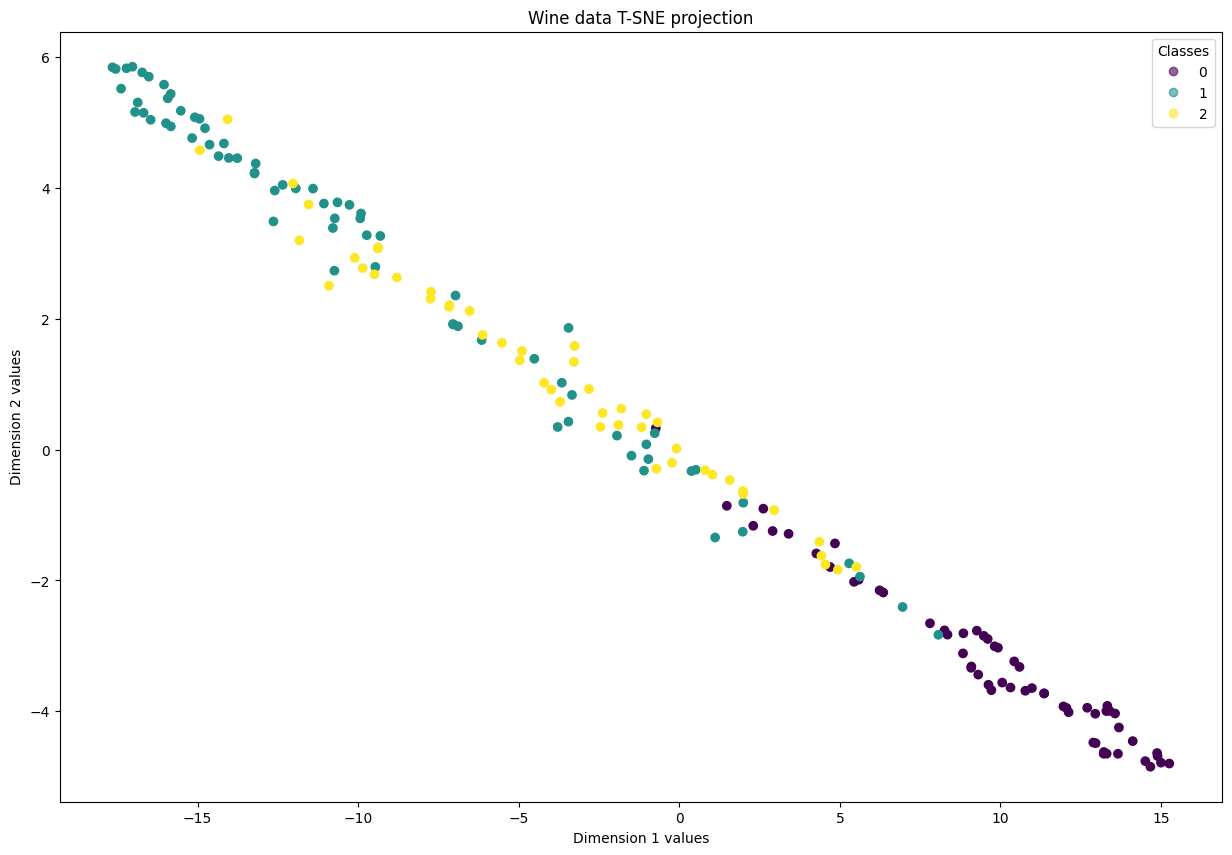

In [5]:
from matplotlib.pyplot import scatter
from matplotlib.pyplot import figure
#Make a scatter plot with X_embedded
figure(figsize=(15, 10))
result = scatter(X_embedded[:,0],X_embedded[:,1],c=data.target)
handles, labels = result.legend_elements(prop="colors", alpha=0.6)

#label x axis and y axis
plt.xlabel('Dimension 1 values')
plt.ylabel('Dimension 2 values')
#label the title
plt.title('Wine data T-SNE projection')
plt.legend(handles, labels, loc="upper right", title="Classes")

plt.show()








### Exercise 3.2:

 Pick any **two** models from the list of sklearn models below:

 *   [LogisticRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

*   [RandomForest](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

*   [MLPClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)

*   [GradientBoosting](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html)
----
Requirements: 

1. First start by **splitting** your data into two sets: train and test using the 80/20 split rule.
2. **Train** your 2 models of choice using the train set. Make sure to set the appropriate hyperparameters for each model.
3. **Evaluate** your trained models on both the train and test data by getting the accuracy.

Note: For reproducibility fix the random_state=42. 
Your test accuracy should be >95%



In [6]:
from sklearn.model_selection import train_test_split

#split into train and test set
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)

(142, 13)
(36, 13)


In [7]:
#Train and evaluate accuracy with 2 of the model, your answer below
from sklearn.linear_model import LogisticRegression

#Train and evaluate accuracy with Logistic Regression
logreg = LogisticRegression(solver='lbfgs', max_iter=1000000)
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}' .format(logreg.score(X_test, y_test)))




#Train and evaluate accuracy with Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
print('Accuracy of Random Forest classifier on training set: {:.2f}' .format(rf.score(X_test, y_test)))




Accuracy of Logistic regression classifier on training set: 1.00
Accuracy of Random Forest classifier on training set: 1.00


---